# Analysis of Activation Functions

In [21]:
import matplotlib.pyplot as plt
import numpy as np

## Rectified Linear Unit (ReLU)
Visual Representation of ReLU

**Equation:**

x <= 0: 0

x > 0: x


**Derivative:**

x <= 0: 0

x > 0: 1

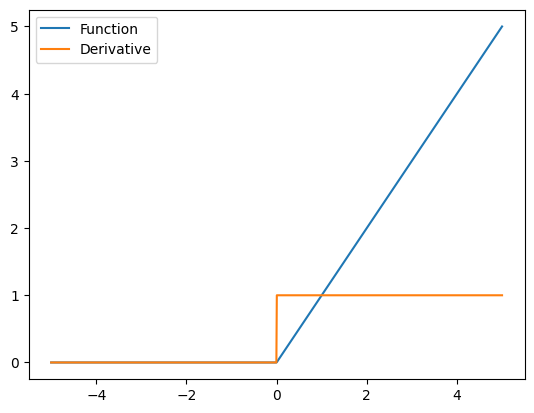

In [17]:
# Computing function of ReLU
c = 1
x = np.linspace(-5, 5, 1000) # Returns evenly spaced numbers over a specified interval
y = c * np.maximum(0, x)

# Computing derivative of ReLU
d_filter = lambda x: c if x > 0 else 0
dyReLU = [d_filter(ele) for ele in x]

plt.plot(x,y, label='Function')
plt.plot(x, dyReLU, label='Derivative')
plt.legend(loc="upper left")
plt.show()

## Leaky ReLU
Visual Representation of Leaky ReLU

**Equation:**

x <= 0: x * fractional value

x > 0: x


**Derivative:**

x <= 0: fractional value

x > 0: 1

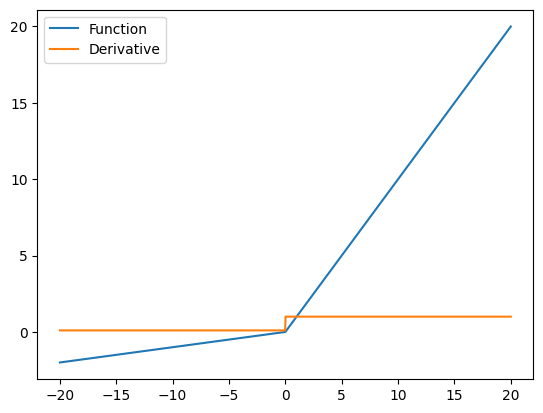

In [18]:
# Computing function of Leaky ReLU
c = 1
a = .1 # Our fractional value
x = np.linspace(-20, 20, 1000)
y = c * np.maximum(a*x, x)

# Computing derivative of Leaky ReLU
d_filter = lambda x: c if x > 0 else a
dyLReLU = c * [d_filter(ele) for ele in x]

plt.plot(x,y, label='Function')
plt.plot(x, dyLReLU, label='Derivative')
plt.legend(loc="upper left")
plt.show()

## Gaussian Error Linear Unit (GELU)
Visual Representation of GELU

**Equation:**

![title](images/Picture1.png)

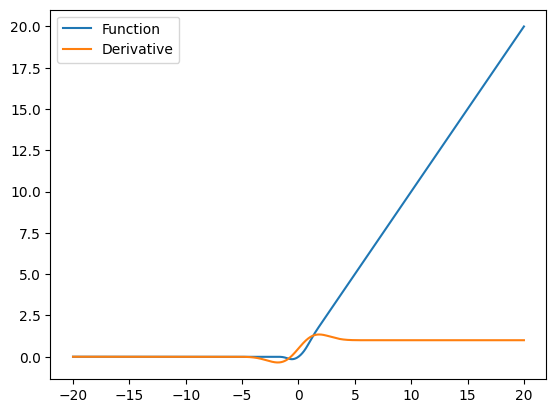

In [23]:
# Computing function of GELU
c = 1
a = .1
x = np.linspace(-20, 20, 1000)
y = 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.44715*np.power(x, 3))))

# Computing derivative of GELU
def gelu_prime(x):
    p1 = 0.5*np.tanh(0.0356774*np.power(x, 3)+0.797885*x)
    p2 = (0.0535161*np.power(x, 3)+0.398942*x)
    p3 = 1/np.cosh(0.0356774*np.power(x, 3)+0.797885*x)
    return p1 + (p2 * p3) + 0.5
dyGELU = c * [gelu_prime(ele) for ele in x]

plt.plot(x,y, label='Function')
plt.plot(x, dyGELU, label='Derivative')
plt.legend(loc="upper left")
plt.show()

## Scaled Exponential Linear Unit (SELU)
Visual Representaiton of SELU

**Equation:**

![title](images/Picture2.png)

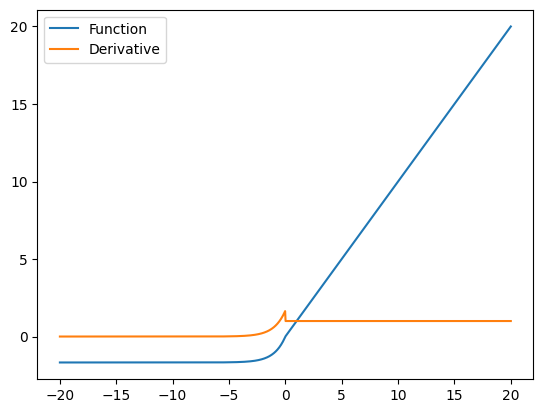

In [24]:
# Computing equation of SELU
c = 1
a = 1.6732632423543772848170429916717
x = np.linspace(-20, 20, 1000)
y = []
for curr_x in x:
    if curr_x < 0:
        y.append(a*np.exp(curr_x)-a)
    else:
        y.append(curr_x)
        
# Computing derivative of SELU
d_filter = lambda x: c if x > 0 else a*np.exp(x)
dySELU = c * [d_filter(ele) for ele in x]

plt.plot(x,y, label='Function') # y=cx
plt.plot(x, dySELU, label='Derivative')
plt.legend(loc="upper left")
plt.show()

## Experiment of Different Activation Functions in the Example for Lecture 04

Inputs (1, 2) --> Hidden Layer (1, 3) --> Output (1)

**ReLU:**

In [46]:
from sklearn import preprocessing

np.random.seed(8)

X = np.random.randint(1, 20, size=(200, 2))
W_1 = 3 * np.random.randn(X.shape[1], 3)
W_2 = 3 * np.random.randn(W_1.shape[1], 1)
Y = X.sum(axis=1)

add_intercept = True
if add_intercept:
    X = np.pad(X, [(0, 0), (1, 0)], 'constant', constant_values=1)
    W_1 = 3 * np.random.randn(X.shape[1], 3)
    W_2 = 3 * np.random.randn(W_1.shape[1], 1)

print(X[:5])
print(Y[:5])
print(f'\nHidden Layer Weights:\n{W_1}')
print(f'\nHidden Layer Weights:\n{W_2}')

lr = .00000001

[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]
[22 16 18 31 29]

Hidden Layer Weights:
[[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

Hidden Layer Weights:
[[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]


In [47]:
def feed_forward(X, W_1, W_2):
    Z_1 = relu(X.dot(W_1)) # ReLU
    Z_2 = Z_1.dot(W_2).sum(axis=1)
    return (Z_1, Z_2)

def relu(Z):
    return (np.maximum(0, Z))


def mse(Z_2, Y):
    # Calculates the sum (error^2)
    return (np.sum(np.power((Y - Z_2), 2)) / Y.shape[0])


def update_weights_linear(X, W_1, W_2, Z_1, Z_2, Y, lr):

    z1_slope = np.where(Z_1>0,1,0)
    error_w2 = W_2.dot((Y - Z_2).reshape(-1, 1).T)
    w1_gradient = -X.T.dot((error_w2.T * z1_slope))
    w1_gradient = w1_gradient / X.shape[0]
    W_1 = W_1 - (lr * w1_gradient)
    
    # Gradient is -2 * X * (error)
    w2_gradient = -Z_1.T.dot((Y-Z_2))
    w2_gradient = w2_gradient / Z_1.shape[0]
    # Calculates the gradient on a per feature basis
    W_2 = W_2 - (lr * w2_gradient).reshape(3, 1)
    return (W_1, W_2)

In [48]:
def mlp_regression_model(X, Y, W_1, W_2, lr=0.0001, epochs=1000, batch_size=20):
    for e_ix in range(epochs):
        Z_1, Z_2 = feed_forward(X, W_1, W_2)
        for ix in range(int(X.shape[0]/batch_size)):
            b_start = ix * batch_size # Starting index of our next batch
            W_1, W_2 = update_weights_linear(X[b_start:b_start+batch_size], W_1,
                                      W_2, Z_1[b_start:b_start+batch_size],
                                      Z_2[b_start:b_start+batch_size],
                                      Y[b_start:b_start+batch_size], lr)
        if e_ix % int(epochs/10) == 0:
            pass
            print(f'loss = {mse(Z_2, Y)}')
    return (W_1, W_2)

In [49]:
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')
# Learning rate above 1e-6 break
W_1, W_2 = mlp_regression_model(X, Y, W_1, W_2, lr=0.00001, epochs=10000, batch_size=20)
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')

W_1:
 [[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

W_2:
 [[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]
loss = 11762.921698711523
loss = 0.6748810076637705
loss = 0.5033709981929599
loss = 0.3796944585648287
loss = 0.28725131035478657
loss = 0.2176895754954502
loss = 0.16515467828492383
loss = 0.12538192556401426
loss = 0.0952221812639622
loss = 0.07232838692129183
W_1:
 [[ 2.47047515  2.30915112  1.79240786]
 [-3.16638679  0.59860714  0.81076684]
 [ 1.44409845  1.54299019  1.42965248]]

W_2:
 [[-0.01863557]
 [-1.46969349]
 [ 2.27165287]]


In [50]:
print(f'\nOur inputs:\n{X[:5]}\n')
print(f'Our predictions:\n{feed_forward(X, W_1, W_2)[1][:5]}\n')
print(f'Our actual:\n{Y[:5]}\n')
print(f'Our resulting weights:\n{W_1}\n')
print(f'Our resulting weights:\n{W_2}\n')


Our inputs:
[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]

Our predictions:
[21.87074095 16.17781109 18.1556539  30.75150581 28.77366301]

Our actual:
[22 16 18 31 29]

Our resulting weights:
[[ 2.47047515  2.30915112  1.79240786]
 [-3.16638679  0.59860714  0.81076684]
 [ 1.44409845  1.54299019  1.42965248]]

Our resulting weights:
[[-0.01863557]
 [-1.46969349]
 [ 2.27165287]]



**Leaky ReLU**

In [55]:
np.random.seed(8)

X = np.random.randint(1, 20, size=(200, 2))
W_1 = 3 * np.random.randn(X.shape[1], 3)
W_2 = 3 * np.random.randn(W_1.shape[1], 1)
Y = X.sum(axis=1)

add_intercept = True
if add_intercept:
    X = np.pad(X, [(0, 0), (1, 0)], 'constant', constant_values=1)
    W_1 = 3 * np.random.randn(X.shape[1], 3)
    W_2 = 3 * np.random.randn(W_1.shape[1], 1)

print(X[:5])
print(Y[:5])
print(f'\nHidden Layer Weights:\n{W_1}')
print(f'\nHidden Layer Weights:\n{W_2}')

lr = .00000001

[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]
[22 16 18 31 29]

Hidden Layer Weights:
[[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

Hidden Layer Weights:
[[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]


In [56]:
def feed_forward(X, W_1, W_2):
    Z_1 = leakyReLU(X.dot(W_1)) # Leaky ReLU
    Z_2 = Z_1.dot(W_2).sum(axis=1)
    return (Z_1, Z_2)

def leakyReLU(Z):
    a = .1 # Our fractional value
    return (np.maximum(a * Z, Z))

In [57]:
def mlp_regression_model(X, Y, W_1, W_2, lr=0.0001, epochs=1000, batch_size=20):
    for e_ix in range(epochs):
        Z_1, Z_2 = feed_forward(X, W_1, W_2)
        for ix in range(int(X.shape[0]/batch_size)):
            b_start = ix * batch_size 
            W_1, W_2 = update_weights_linear(X[b_start:b_start+batch_size], W_1,
                                      W_2, Z_1[b_start:b_start+batch_size],
                                      Z_2[b_start:b_start+batch_size],
                                      Y[b_start:b_start+batch_size], lr)
        if e_ix % int(epochs/10) == 0:
            pass
            print(f'loss = {mse(Z_2, Y)}')
    return (W_1, W_2)

In [58]:
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')
# Learning rate above 1e-6 break
W_1, W_2 = mlp_regression_model(X, Y, W_1, W_2, lr=0.00001, epochs=10000, batch_size=20)
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')

W_1:
 [[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

W_2:
 [[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]
loss = 11647.594708599318
loss = 0.684094080537747
loss = 0.48329581607857813
loss = 0.364036856703672
loss = 0.27668807387788247
loss = 0.21077388474236936
loss = 0.16073561489468177
loss = 0.12265266900791484
loss = 0.09362398738690442
loss = 0.0714755018606779
W_1:
 [[ 2.47096806  2.30905062  1.79304986]
 [-3.16362403  0.60330825  0.81007466]
 [ 1.45665327  1.54039723  1.42967053]]

W_2:
 [[-0.02257359]
 [-1.46968753]
 [ 2.27231666]]


In [59]:
print(f'\nOur inputs:\n{X[:5]}\n')
print(f'Our predictions:\n{feed_forward(X, W_1, W_2)[1][:5]}\n')
print(f'Our actual:\n{Y[:5]}\n')
print(f'Our resulting weights:\n{W_1}\n')
print(f'Our resulting weights:\n{W_2}\n')


Our inputs:
[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]

Our predictions:
[21.8607936  16.17618648 18.15939368 30.75646448 28.77325728]

Our actual:
[22 16 18 31 29]

Our resulting weights:
[[ 2.47096806  2.30905062  1.79304986]
 [-3.16362403  0.60330825  0.81007466]
 [ 1.45665327  1.54039723  1.42967053]]

Our resulting weights:
[[-0.02257359]
 [-1.46968753]
 [ 2.27231666]]



**GELU:**

In [60]:
np.random.seed(8)

X = np.random.randint(1, 20, size=(200, 2))
W_1 = 3 * np.random.randn(X.shape[1], 3)
W_2 = 3 * np.random.randn(W_1.shape[1], 1)
Y = X.sum(axis=1)

add_intercept = True
if add_intercept:
    X = np.pad(X, [(0, 0), (1, 0)], 'constant', constant_values=1)
    W_1 = 3 * np.random.randn(X.shape[1], 3)
    W_2 = 3 * np.random.randn(W_1.shape[1], 1)

print(X[:5])
print(Y[:5])
print(f'\nHidden Layer Weights:\n{W_1}')
print(f'\nHidden Layer Weights:\n{W_2}')

lr = .00000001

[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]
[22 16 18 31 29]

Hidden Layer Weights:
[[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

Hidden Layer Weights:
[[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]


In [61]:
def feed_forward(X, W_1, W_2):
    Z_1 = gelu(X.dot(W_1)) # GELU
    Z_2 = Z_1.dot(W_2).sum(axis=1)
    return (Z_1, Z_2)

def gelu(Z):
    return (0.5 * Z * (1 + np.tanh(np.sqrt(2/np.pi) * (Z + 0.44715 * np.power(Z, 3)))))

In [62]:
def mlp_regression_model(X, Y, W_1, W_2, lr=0.0001, epochs=1000, batch_size=20):
    for e_ix in range(epochs):
        Z_1, Z_2 = feed_forward(X, W_1, W_2)
        for ix in range(int(X.shape[0]/batch_size)):
            b_start = ix * batch_size 
            W_1, W_2 = update_weights_linear(X[b_start:b_start+batch_size], W_1,
                                      W_2, Z_1[b_start:b_start+batch_size],
                                      Z_2[b_start:b_start+batch_size],
                                      Y[b_start:b_start+batch_size], lr)
        if e_ix % int(epochs/10) == 0:
            pass
            print(f'loss = {mse(Z_2, Y)}')
    return (W_1, W_2)

In [63]:
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')
# Learning rate above 1e-6 break
W_1, W_2 = mlp_regression_model(X, Y, W_1, W_2, lr=0.00001, epochs=10000, batch_size=20)
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')

W_1:
 [[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

W_2:
 [[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]
loss = 11767.712722042936
loss = 0.6753389089207551
loss = 0.503663658420346
loss = 0.37982037801084867
loss = 0.28727245205884405
loss = 0.21764949628635122
loss = 0.1650816974549808
loss = 0.12529411991384334
loss = 0.09513080188295137
loss = 0.07224014503139557
W_1:
 [[ 2.47046446  2.30924201  1.79226547]
 [-3.16641646  0.59854697  0.8108512 ]
 [ 1.44406122  1.5428852   1.42969469]]

W_2:
 [[-0.01849652]
 [-1.46969231]
 [ 2.27143301]]


In [64]:
print(f'\nOur inputs:\n{X[:5]}\n')
print(f'Our predictions:\n{feed_forward(X, W_1, W_2)[1][:5]}\n')
print(f'Our actual:\n{Y[:5]}\n')
print(f'Our resulting weights:\n{W_1}\n')
print(f'Our resulting weights:\n{W_2}\n')


Our inputs:
[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]

Our predictions:
[21.87139217 16.17761387 18.15516714 30.7515275  28.77397423]

Our actual:
[22 16 18 31 29]

Our resulting weights:
[[ 2.47046446  2.30924201  1.79226547]
 [-3.16641646  0.59854697  0.8108512 ]
 [ 1.44406122  1.5428852   1.42969469]]

Our resulting weights:
[[-0.01849652]
 [-1.46969231]
 [ 2.27143301]]



**SELU:**

In [65]:
np.random.seed(8)

X = np.random.randint(1, 20, size=(200, 2))
W_1 = 3 * np.random.randn(X.shape[1], 3)
W_2 = 3 * np.random.randn(W_1.shape[1], 1)
Y = X.sum(axis=1)

add_intercept = True
if add_intercept:
    X = np.pad(X, [(0, 0), (1, 0)], 'constant', constant_values=1)
    W_1 = 3 * np.random.randn(X.shape[1], 3)
    W_2 = 3 * np.random.randn(W_1.shape[1], 1)

print(X[:5])
print(Y[:5])
print(f'\nHidden Layer Weights:\n{W_1}')
print(f'\nHidden Layer Weights:\n{W_2}')

lr = .00000001

[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]
[22 16 18 31 29]

Hidden Layer Weights:
[[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

Hidden Layer Weights:
[[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]


In [66]:
def feed_forward(X, W_1, W_2):
    Z_1 = selu(X.dot(W_1)) # SELU
    Z_2 = Z_1.dot(W_2).sum(axis=1)
    return (Z_1, Z_2)

def selu(Z):
    if Z >= 0:
        return Z
    a = 1.6732632423543772848170429916717
    return 0 # Need to update